# Hooli Questions

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Conversion to paying customers (free-tier to paying)

#### 2. What are the predictors/covariates? 

age, gender, location, profession, # days since last log in, activity score (0/1)

#### 3. What timeframe is this data relevent for?

Jan - April 2005

#### 4. What is the hypothesis?

High activity / useage customers who are from affluent areas will be more likely to convert from free-tier to paying customers. 

# UCLA Admissions

### Let's get started with our dataset

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels.api as sm

data = pd.read_csv("./admissions.csv") #pd.read_csv automatically creates a data frame, also updated your code with './' to look in same directory

data['gre_bins'] = pd.qcut(data['gre'],15)
data['gpa_bins'] = pd.qcut(data['gpa'],5)

data.head()
# printing just head and tail to save space


,admit,gre,gpa,prestige,gre_bins,gpa_bins
0,0,380,3.61,3,"[220, 400]","(3.5, 3.756]"
1,1,660,3.67,3,"(640, 660]","(3.5, 3.756]"
2,1,800,4.00,1,"(780, 800]","(3.756, 4]"
3,1,640,3.19,4,"(620, 640]","(3.05, 3.31]"
4,0,520,2.93,4,"(500, 520]","[2.26, 3.05]"


In [53]:
data.tail()

,admit,gre,gpa,prestige,gre_bins,gpa_bins
395,0,620,4.00,2,"(600, 620]","(3.756, 4]"
396,0,560,3.04,3,"(540, 560]","[2.26, 3.05]"
397,0,460,2.63,2,"(400, 460]","[2.26, 3.05]"
398,0,700,3.65,2,"(680, 720]","(3.5, 3.756]"
399,0,600,3.89,3,"(580, 600]","(3.756, 4]"


## Data Dictionary & Description

Variable | Description | Var Type
--|--|--
Admit      |     0 = no admit, 1 = admit  |  Categorical
GRE        |     Score 200 - 800          |  Continuous, Discrete
GPA        |     0 - 4.0                  |  Continuous
Prestige   |     1 = lowest prestige, 2 = low prestige, 3 = high prestige, 4 = highest prestige      | Categorical



   ### Admitted

In [4]:

data = pd.DataFrame(pd.read_csv("admissions.csv"))
data_admit = data[data["admit"]==1]
data_noadmit = data[data["admit"]==0]
data_admit.describe()


,admit,gre,gpa,prestige
count,127,127.000000,126.000000,126.000000
mean,1,618.897638,3.489206,2.150794
std,0,108.884884,0.371655,0.921455
min,1,300.000000,2.420000,1.000000
25%,1,540.000000,3.220000,1.000000
50%,1,620.000000,3.545000,2.000000
75%,1,680.000000,3.757500,3.000000
max,1,800.000000,4.000000,4.000000


### Not Admitted

In [5]:
data_noadmit.describe()

,admit,gre,gpa,prestige
count,273,271.000000,272.000000,273.000000
mean,0,573.579336,3.345404,2.641026
std,0,116.052798,0.376773,0.917198
min,0,220.000000,2.260000,1.000000
25%,0,500.000000,3.080000,2.000000
50%,0,580.000000,3.340000,3.000000
75%,0,660.000000,3.610000,3.000000
max,0,800.000000,4.000000,4.000000


In [71]:
print data.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [73]:
print pd.crosstab(data['admit'], data['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  53  28  12


In [74]:
print pd.crosstab(data['admit'], data['gre_bins'], rownames=['admit'])

gre_bins  [220, 400]  (400, 460]  (460, 500]  (500, 520]  (520, 540]  \
admit                                                                  
0                 27          24          29          14          18   
1                  4           6           8          10           9   

gre_bins  (540, 560]  (560, 580]  (580, 600]  (600, 620]  (620, 640]  \
admit                                                                  
0                 18          22          14          18          16   
1                  6           6           9          12           5   

gre_bins  (640, 660]  (660, 680]  (680, 720]  (720, 780]  (780, 800]  
admit                                                                 
0                 12          11          25           9          14  
1                 12           9           8          12          11  


In [75]:
print pd.crosstab(data['admit'], data['gpa_bins'], rownames=['admit'])

gpa_bins  [2.26, 3.05]  (3.05, 3.31]  (3.31, 3.5]  (3.5, 3.756]  (3.756, 4]
admit                                                                      
0                   62            64           57            41          48
1                   20            17           22            35          32


#### 1. What is the outcome?

Admission / No Admission to graduate school at UCLA

#### 2. What are the predictors/covariates? 

GRE, GPA, Prestige

Additionally I would look to factor to the 3rd degree and look for interactions. My initial reasoning was that a high prestige school, perceived to be more competitive/difficult might mean a student with lower GRE/GPA could still be considered a competitve candidate (Ex. a 3.0 from Harvard > 4.0 from XYZ Community College) but the distribution doesn't support that so I would be testing for the nature of the relationship between Prestige and the other variables.

- GRE*GPA
- GRE*Prestige
- GPA*Prestige
- GPA*Prestige*GRE

#### 3. What timeframe is this data relevent for?

Not available / made clear, but I would say it's a risk of the data to be unaware of how and when the data was collected.

#### 4. What is the hypothesis?

Based on ditribution of the data I hypothesize that GRE score and GPA are the primary predictors of successful admission to UCLA's graduate school and that prestige has less impact or possibly a negative relationship to the likelihood an individual will be admitted.

    Using the above information, write a well-formed problem statement. 


#### 5. Problem Statement
Using 400 records we want to determine how likely potential UCLA candidates are to be admitted to grad school prior to the Fall of 2016 based on a variety of factors including GRE score, GPA, and the prestige of their undergrad school. Collection time period and methods for the data are not available and will be considered risks for this analysis.

# Exploratory Analysis Plan

Using the lab from class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

- Determine where, when, and how the data was collected
- Determine data type (cross sectional vs longitudinal), parse data and determine the veracity of the data
- Determine distribution and consider transformation
- Print basic stats for this data (Ex. mean, max, min, etc.)

#### 2a. What are the assumptions of the distribution of data? 

Normality

#### 2b. How will determine the distribution of your data? 

Histograms

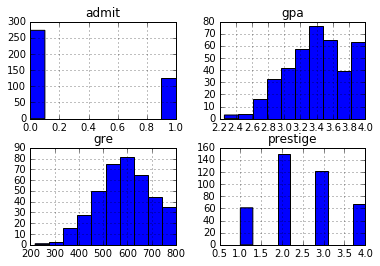

In [6]:
data.hist()
pl.show()

#### 3a. How might outliers impact your analysis? 

Can cause data to skew

#### 3b. How will you test for outliers? 

Testing for normality is the first step, box plots are good as well..these help check for normality and detect outliers...if the normallity assumption comes through then visualizing the upper and lower tails of the distribution would show you outliers

#### 4a. What is colinearity? 

When two variables are linearly correlated to a degree that one could reliably predict the other. If can inflate the model and is why a correlation matrix and is why you look to VIF / test for severity of correlation in variables. 

#### 4b. How will you test for colinearity? 

Correlation matrix and VIF

#### 5. What is your exploratory analysis plan?

Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

> Before reproducing analysis: Obtain data (previously I said I'd want to find out find out where the data was from and when it was collected in my exploratory analysis...that was partially for reproducability)

> Step 1 - Check for missing data and adjust the data set accordingly to improve usefulness of the data

> Step 2 - Check for multicollinearity using correlation matrix and look at each variable's VIF

> Step 3 - Conduct frequency and distribution analysis utilizing histogram visualization and determine distribution of your data

### Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

#### 1. 
Nominal logistic regression setting admit/not admit as the 0/1 target variable

#### 2. 
Using 400 records we want to determine the influence GPA and school prestige have on a student's GRE score. We will conduct the analysis prior to the Fall of 2016. 

#### 3. 
Normality is assumed as are proper and reliable data collection methods because the exact time and methods are not known. This data is for students who applied to UCLA so we assume that there is no inherent trend higher or lower in GRE scores of those who apply to grad school at UCLA.

In [7]:
prestige_dummyv = pd.get_dummies(data['prestige'], prefix='prestige')
print prestige_dummyv.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


In [8]:
keep_columns = ['admit', 'gre', 'gpa']
newdata = data[keep_columns].join(prestige_dummyv.ix[:, 'prestige_2.0':])
print newdata.head()

   admit  gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380  3.61             0             1             0
1      1  660  3.67             0             1             0
2      1  800  4.00             0             0             0
3      1  640  3.19             0             0             1
4      0  520  2.93             0             0             1


In [83]:
newdata['int'] = 1